In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Load the dataset
path_file = os.path.join("../dataset", "matje.csv")
df = pd.read_csv(path_file)


In [4]:
# Convert the 'created_at' column to datetime, if you plan to use date or time as features
df['created_at'] = pd.to_datetime(df['created_at'])

# Assuming 'trysnia' and 'lageshtira' represent some form of air pressure
# Prepare the feature columns and the target column
features = ['pm2_5', 'pm10', 'temp', 'trysnia', 'lageshtira']
X = df[features]
y = df['alarm_status']


In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=32)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

In [7]:
# Predict on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


In [8]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9886363636363636
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       228
           1       0.97      1.00      0.98       124

    accuracy                           0.99       352
   macro avg       0.98      0.99      0.99       352
weighted avg       0.99      0.99      0.99       352



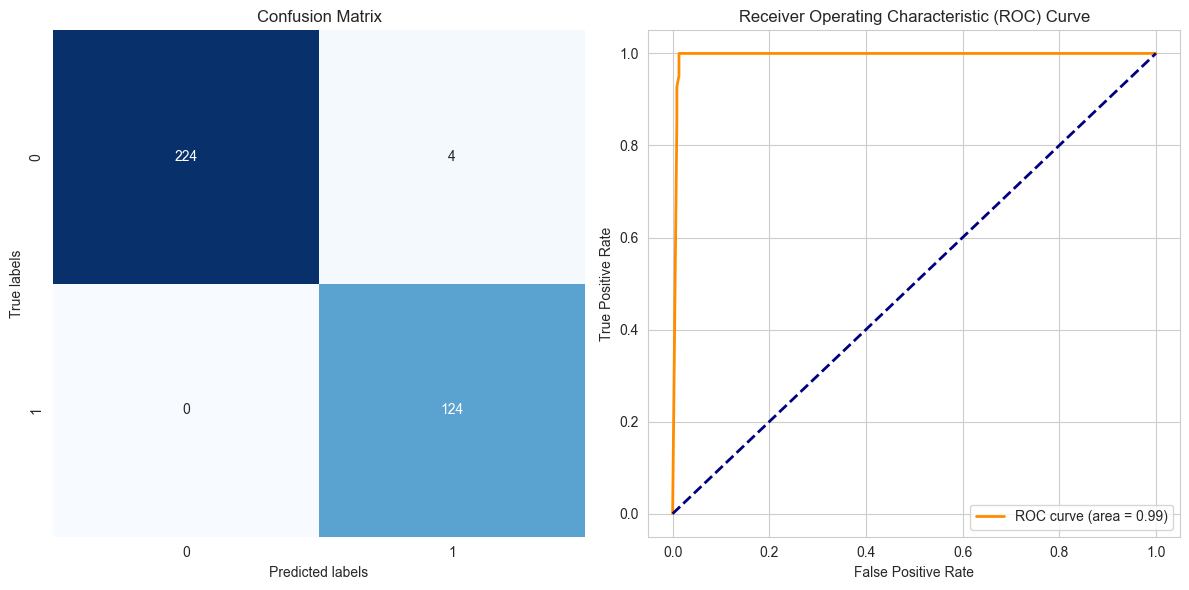

In [9]:
# Visualize the confusion matrix
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()